<a href = "https://colab.research.google.com/github/flyingzaptop/python-colab/blob/main/%D0%94%D0%BE%D0%BC%D 0%B0%D1%88%D0%BD%D1%8f%20%D0%BA%D0%BB%D0%D1%81%D0%B8%D1%84%D1%96%D0%D0%B0%D1%86%D1%D1%Target = "_ Parent" „https://colab.research.google.com/assets/colab-badge.svg” alt = "Otwórz w colab"/> </a>

Import modułów

In [1]:
import torch
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

Dane bananowe

In [2]:
# трохи обробки даних
df = pd.read_csv('https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/banana_quality.csv')

df['Quality'] = df['Quality'].map({'Good': 1, 'Bad': 0})

columns = df.columns.delete(-1)
data = df[columns]
df[columns] = (data - data.min()) / (data.max() - data.min())

In [3]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,0.380309,0.626747,0.680712,0.360975,0.567312,0.671933,0.543416,1
1,0.349951,0.628093,0.485275,0.293682,0.481689,0.646850,0.545720,1
2,0.478460,0.699448,0.572694,0.283811,0.499358,0.716580,0.617337,1
3,0.446465,0.705394,0.595677,0.374028,0.473461,0.633590,0.556625,1
4,0.541672,0.687704,0.458841,0.378242,0.442847,0.579430,0.705908,1


Musisz przewidzieć jego jakość „jakość” na podstawie informacji o bananie

# Zadanie 1
Utwórz klasę zestawu danych do szkolenia i testów testowych

In [4]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split

class MyDataset(Dataset):
    def __init__(self, X, y):
      self.X = torch.FloatTensor(X.values)
      self.y = torch.FloatTensor(y.values)
      self.y = self.y.reshape(-1, 1)

    def __len__(self):
      return len(self.X)

    def __getitem__(self, idx):
      return self.X[idx], self.y[idx]

# Create dataset object
X = df.drop(columns=['Quality'])
y = df['Quality']

dataset = MyDataset(X, y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42,
                                                    stratify=y)

dataset_train = MyDataset(X_train, y_train)
dataset_test = MyDataset(X_test, y_test)

## weryfikacja

In [8]:
def check_initialization(X, y):
    try:
        dataset = MyDataset(X, y)
        if torch.is_tensor(dataset.X) and torch.is_tensor(dataset.y):
            print("[OK] Ініціалізація коректна.")
        else:
            print("[FAILED] Ініціалізація не вдалася: X або y не є тензорами.")
    except Exception as e:
        print(f"[FAILED] Помилка ініціалізації: {e}")

def check_y_shape(dataset):
    if dataset.y.ndim == 2 and dataset.y.shape[1] == 1:
        print("[OK] 'y' правильно перетворений на вектор-стовпець.")
    else:
        print(f"[FAILED] 'y' перетворений некоректно, поточна форма: {dataset.y.shape}")

def check_length(dataset, expected_length):
    if len(dataset) == expected_length:
        print("[OK] Перевірка довжини пройдена.")
    else:
        print(f"[FAILED] Перевірка довжини не вдалася. Очікувана довжина: {expected_length}, отримана: {len(dataset)}.")

def check_getitem(dataset, idx):
    try:
        X_item, y_item = dataset[idx]
        if torch.is_tensor(X_item) and torch.is_tensor(y_item):
            print(f"[OK] Отримання елемента коректне для індексу {idx}.")
        else:
            print(f"[FAILED] Отримання елемента некоректне для індексу {idx}.")
    except Exception as e:
        print(f"[FAILED] Помилка у методі `__getitem__`: {e}")

def check_tensor_types(dataset):
    if dataset.X.dtype == torch.float32 and dataset.y.dtype == torch.float32:
        print("[OK] X та y збережені як FloatTensor.")
    else:
        print(f"[FAILED] Невідповідність типу тензорів: X має тип {dataset.X.dtype}, y має тип {dataset.y.dtype}.")

In [9]:
def main_checks():
    print("\n=== Виконання перевірок ===")
    check_initialization(X, y)
    check_y_shape(dataset_train)
    check_length(dataset_train, len(X_train))
    check_getitem(dataset_train, 0)
    check_tensor_types(dataset_train)
    print("=== Перевірки завершені ===\n")


main_checks()


=== Виконання перевірок ===
[OK] Ініціалізація коректна.
[OK] 'y' правильно перетворений на вектор-стовпець.
[OK] Перевірка довжини пройдена.
[OK] Отримання елемента коректне для індексу 0.
[OK] X та y збережені як FloatTensor.
=== Перевірки завершені ===



# Zadanie 2
Utwórz DataSaloader

In [10]:
from torch.utils.data import DataLoader

batch_size = 128
train_dl = DataLoader(dataset_train,
                      batch_size=batch_size,
                      shuffle=True)

test_dl = DataLoader(dataset_test,
                     batch_size=batch_size,
                     shuffle=True)

## weryfikacja

In [11]:
def check_batch_size(batch_size):
    if isinstance(batch_size, int) and batch_size > 0:
        print(f"[OK] batch_size встановлений як {batch_size}.")
    else:
        print(f"[FAILED] batch_size некоректний, поточне значення: {batch_size}")

def check_dataloader_initialization(dataset, batch_size):
    try:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        if isinstance(dataloader, DataLoader):
            print(f"[OK] DataLoader створений коректно з batch_size = {batch_size}.")
        else:
            print("[FAILED] DataLoader не створений.")
    except Exception as e:
        print(f"[FAILED] Помилка під час ініціалізації DataLoader: {e}")

def check_dataloader_loading(dataloader, batch_size):
    try:
        for batch in dataloader:
            print(f"[OK] Форма ознак у батчі: {batch[0].shape}, Форма цільових змінних: {batch[1].shape}")
            if batch[0].shape[0] == batch_size or len(dataloader.dataset) % batch_size != 0:
                print(f"[OK] DataLoader завантажує дані пакетами по {batch_size}.")
            else:
                print(f"[FAILED] Розмір батчу некоректний, очікувано: {batch_size}")
            break
    except Exception as e:
        print(f"[FAILED] Помилка під час завантаження DataLoader: {e}")

In [12]:
def main_checks_dataloader():
    print("\n=== Виконання перевірок DataLoader ===")
    check_batch_size(batch_size)
    check_dataloader_initialization(dataset_train, batch_size)
    check_dataloader_loading(train_dl, batch_size)
    print("=== Перевірки завершені ===\n")

main_checks_dataloader()


=== Виконання перевірок DataLoader ===
[OK] batch_size встановлений як 128.
[OK] DataLoader створений коректно з batch_size = 128.
[OK] Форма ознак у батчі: torch.Size([128, 7]), Форма цільових змінних: torch.Size([128, 1])
[OK] DataLoader завантажує дані пакетами по 128.
=== Перевірки завершені ===



# Zadanie 3
Utwórz sieć neuronową

In [13]:
import numpy as np
from torch import nn
import torch.nn.functional as F


class BinaryClassifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()

        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.linear1(x)
        out = F.relu(out)

        out = self.linear2(out)
        out = F.sigmoid(out)
        return out

    def predict(self, X, device='cpu'):
        X = torch.FloatTensor(np.array(X)).to(device)

        with torch.no_grad():
          y_pred = self.forward(X)

        return y_pred.cpu().numpy()


model = BinaryClassifier(7, 100, 1).to(device)
model

BinaryClassifier(
  (linear1): Linear(in_features=7, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=1, bias=True)
)

In [14]:
def check_last_activation(model):
    # Використовуємо фіктивний вхід для перевірки виходу останнього шару
    input_dim = model.linear1.in_features
    test_input = torch.randn(100, input_dim)

    try:
        # Пропускаємо через forward, щоб перевірити останню функцію активації
        output = model.forward(test_input)

        if isinstance(output, torch.Tensor):
            # Перевіряємо, чи відповідає вихід сигмоїді (діапазон значень між 0 і 1)
            if torch.all(output >= 0) and torch.all(output <= 1):
                print("[OK] Остання функція активації - sigmoid")
            else:
                print("[FAILED] Остання функція активації не sigmoid, вихід: ", output)
        else:
            print("[FAILED] Невірний вихід, очікувався тензор")
    except Exception as e:
        print(f"[FAILED] Помилка під час перевірки функції активації sigmoid: {e}")

# Перевірка функції forward
def check_forward(model, input_shape):
    try:
        input_tensor = torch.randn(input_shape)
        output = model.forward(input_tensor)

        if output.shape[1] == 1:
            print(f"[OK] Функція forward працює, вихід: {output.shape}")
        else:
            print(f"[FAILED] Невірний вихід функції forward, вихід: {output.shape}")
    except Exception as e:
        print(f"[FAILED] Помилка у функції forward: {e}")

# Перевірка функції predict
def check_predict(model, X_sample):
    try:
        device = 'cpu'  # Можна змінити на GPU, якщо потрібно
        output = model.predict(X_sample, device=device)

        if isinstance(output, np.ndarray):
            print("[OK] Функція predict працює, вихід - NumPy масив")
        else:
            print("[FAILED] Невірний тип виходу функції predict, очікується NumPy масив")
    except Exception as e:
        print(f"[FAILED] Помилка у функції predict: {e}")

In [15]:
# Основна функція для виклику перевірок
def main_check(model, input_shape, X_sample):
    print("Розпочинаю перевірку моделі...")
    check_last_activation(model)
    check_forward(model, input_shape)
    check_predict(model, X_sample)


main_check(model, X_train.shape, X_train)

Розпочинаю перевірку моделі...
[OK] Остання функція активації - sigmoid
[OK] Функція forward працює, вихід: torch.Size([6400, 1])
[OK] Функція predict працює, вихід - NumPy масив


# Zadanie 4
Określ funkcję straty i optymalizator

In [16]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Zadanie 5
Zawiesić sieć neuronową. Odwiedź niewielką liczbę epok

In [17]:
# @title Функція для тренування
import time

def train(model, optimizer, loss_fn, train_dl, val_dl,
          metrics=None, metrics_name=None, epochs=20, device='cpu', task='regression'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parameters
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Loss function (e.g. nn.CrossEntropyLoss())
    train_dl :
        Iterable dataloader for training data.
    val_dl :
        Iterable dataloader for validation data.
    metrics: list
        List of sklearn metrics functions to be calculated
    metrics_name: list
        List of matrics names
    epochs : int
        Number of epochs to run
    device : string
        Specifies 'cuda' or 'cpu'
    task : string
        type of problem. It can be regression, binary or multiclass

    Returns
    -------
    Dictionary
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    metrics = metrics if metrics else []
    metrics_name = metrics_name if metrics_name else [metric.__name__ for metric in metrics]

    history = {} # Collects per-epoch loss and metrics like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    for name in metrics_name:
        history[name] = []
        history[f'val_{name}'] = []

    start_time_train = time.time()

    for epoch in range(epochs):

        # --- TRAIN AND EVALUATE ON TRAINING SET -----------------------------
        start_time_epoch = time.time()

        model.train()
        history_train = {name: 0 for name in ['loss']+metrics_name}

        for batch in train_dl:
            x    = batch[0].to(device)
            y    = batch[1].to(device)
            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = y_pred.detach().cpu().numpy()
            y = y.detach().cpu().numpy()


            history_train['loss'] += loss.item() * x.size(0)
            for name, func in zip(metrics_name, metrics):
              try:
                  history_train[name] += func(y, y_pred) * x.size(0)
              except:
                  if task == 'binary': y_pred_ = y_pred.round()
                  elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)
                  history_train[name] += func(y, y_pred_) * x.size(0)

        for name in history_train:
            history_train[name] /= len(train_dl.dataset)


        # --- EVALUATE ON VALIDATION SET -------------------------------------
        model.eval()
        history_val = {'val_' + name: 0 for name in metrics_name+['loss']}

        with torch.no_grad():
            for batch in val_dl:
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                y_pred = model(x)
                loss = loss_fn(y_pred, y)

                y_pred = y_pred.cpu().numpy()
                y = y.cpu().numpy()

                history_val['val_loss'] += loss.item() * x.size(0)
                for name, func in zip(metrics_name, metrics):
                    try:
                        history_val['val_'+name] += func(y, y_pred) * x.size(0)
                    except:
                        if task == 'binary': y_pred_ = y_pred.round()
                        elif task == 'multiclass': y_pred_ = y_pred.argmax(axis=-1)

                        history_val['val_'+name] += func(y, y_pred_) * x.size(0)

        for name in history_val:
            history_val[name] /= len(val_dl.dataset)

        # PRINTING RESULTS

        end_time_epoch = time.time()

        for name in history_train:
            history[name].append(history_train[name])
            history['val_'+name].append(history_val['val_'+name])

        total_time_epoch = end_time_epoch - start_time_epoch

        print(f'Epoch {epoch+1:4d} {total_time_epoch:4.0f}sec', end='\t')
        for name in history_train:
            print(f'{name}: {history[name][-1]:10.3g}', end='\t')
            print(f"val_{name}: {history['val_'+name][-1]:10.3g}", end='\t')
        print()

    # END OF TRAINING LOOP

    end_time_train       = time.time()
    total_time_train     = end_time_train - start_time_train
    print()
    print('Time total:     %5.2f sec' % (total_time_train))

    return history

In [18]:
from sklearn.metrics import accuracy_score, roc_auc_score

history = train(model, optimizer, loss_fn, train_dl, test_dl,
                epochs=20,
                metrics=[accuracy_score, roc_auc_score],
                device=device,
                task='binary')

train() called: model=BinaryClassifier, opt=SGD(lr=0.001000), epochs=20, device=cpu

Epoch    1    1sec	loss:      0.698	val_loss:      0.697	accuracy_score:      0.501	val_accuracy_score:      0.501	roc_auc_score:      0.653	val_roc_auc_score:      0.662	
Epoch    2    0sec	loss:      0.697	val_loss:      0.696	accuracy_score:      0.501	val_accuracy_score:      0.501	roc_auc_score:       0.65	val_roc_auc_score:      0.665	
Epoch    3    0sec	loss:      0.696	val_loss:      0.696	accuracy_score:      0.501	val_accuracy_score:      0.501	roc_auc_score:      0.651	val_roc_auc_score:      0.662	
Epoch    4    0sec	loss:      0.695	val_loss:      0.695	accuracy_score:      0.501	val_accuracy_score:      0.501	roc_auc_score:      0.652	val_roc_auc_score:      0.669	
Epoch    5    0sec	loss:      0.695	val_loss:      0.694	accuracy_score:      0.501	val_accuracy_score:      0.501	roc_auc_score:      0.655	val_roc_auc_score:      0.673	
Epoch    6    0sec	loss:      0.694	val_loss:      0.69

# Zadanie 6
Wydaj wykres metryki i Marysów błędów

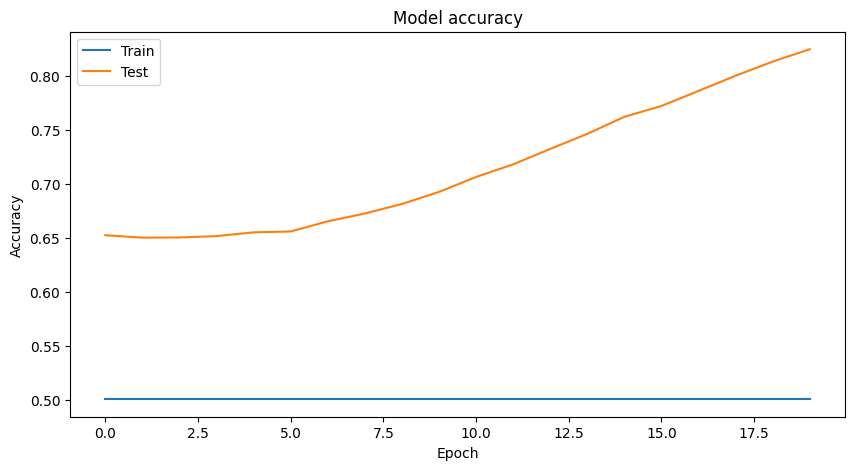

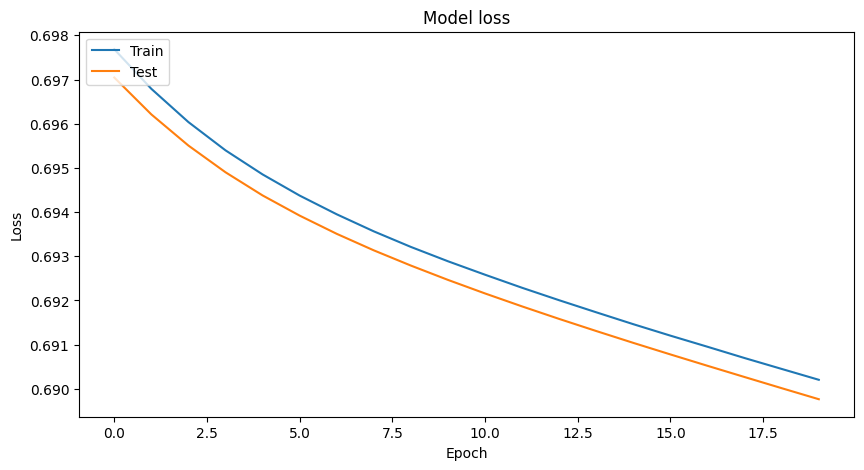

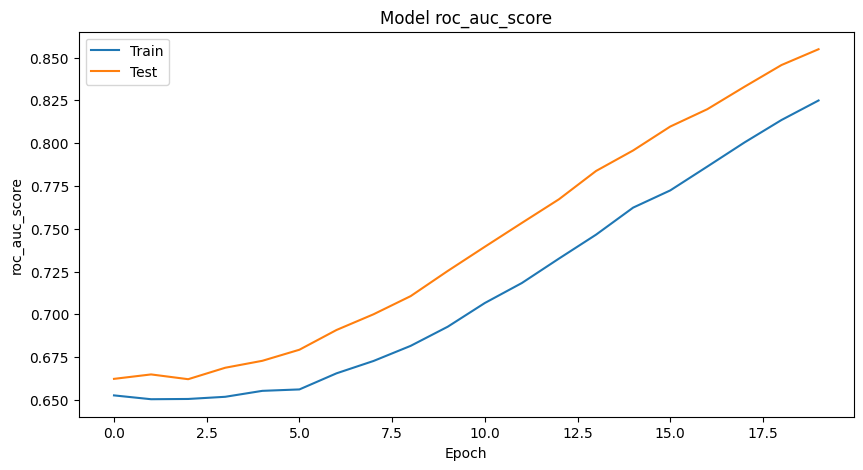

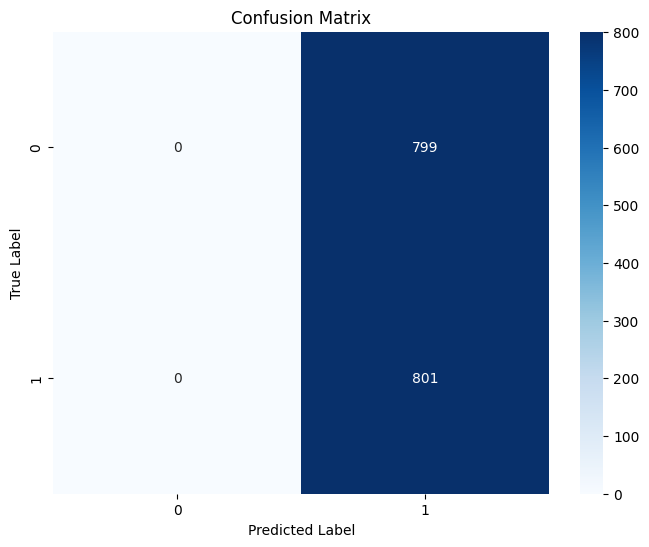

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(history['accuracy_score'])
plt.plot(history['roc_auc_score'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history['roc_auc_score'])
plt.plot(history['val_roc_auc_score'])
plt.title('Model roc_auc_score')
plt.ylabel('roc_auc_score')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


with torch.no_grad():
    y_pred_list = []
    y_true_list = []
    for batch in test_dl:
        x, y = batch
        x = x.to(device)
        y_pred = model(x)
        y_pred_tag = torch.round(y_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())
        y_true_list.append(y.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]
y_true_list = [a.squeeze().tolist() for a in y_true_list]
y_pred_list = sum(y_pred_list, [])
y_true_list = sum(y_true_list, [])

conf_mat = confusion_matrix(y_true_list, y_pred_list)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()